In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

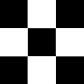

In [39]:
Image(filename='checkerboard_18x18.png')

In [40]:
cb_img = cv2.imread('checkerboard_18x18.png', 0)

print(cb_img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
# print the size of image
print("Image size: ", cb_img.shape)

# print data-type of image
print("data type of image is", cb_img.dtype)

Image size:  (84, 84)
data type of image is uint8


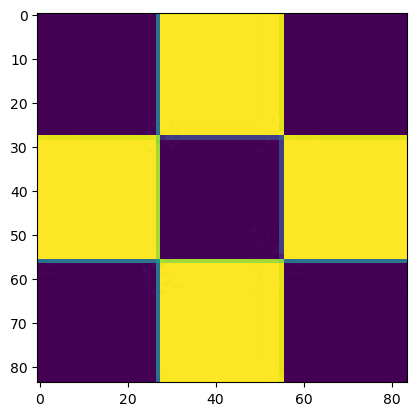

In [42]:
# display image
plt.imshow(cb_img)

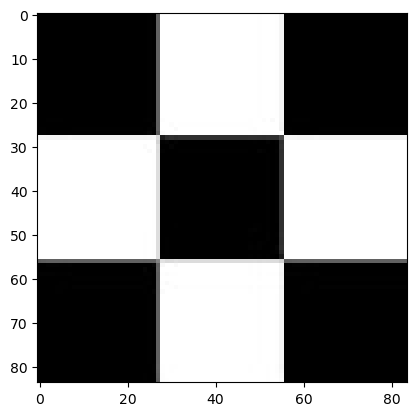

In [43]:
# set color map to gray scale for proper rendering. 
plt.imshow(cb_img, cmap='gray')

In [44]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
        
        
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

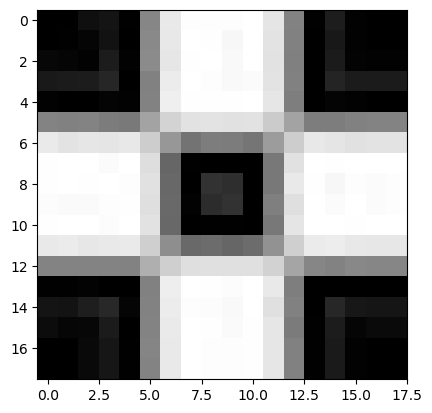

In [45]:
cb_img_fuzzy = cv2.imread("checkerboard_fuzzy_18x18.jpg", 0)

print(cb_img_fuzzy)

plt.imshow(cb_img_fuzzy, cmap='gray')

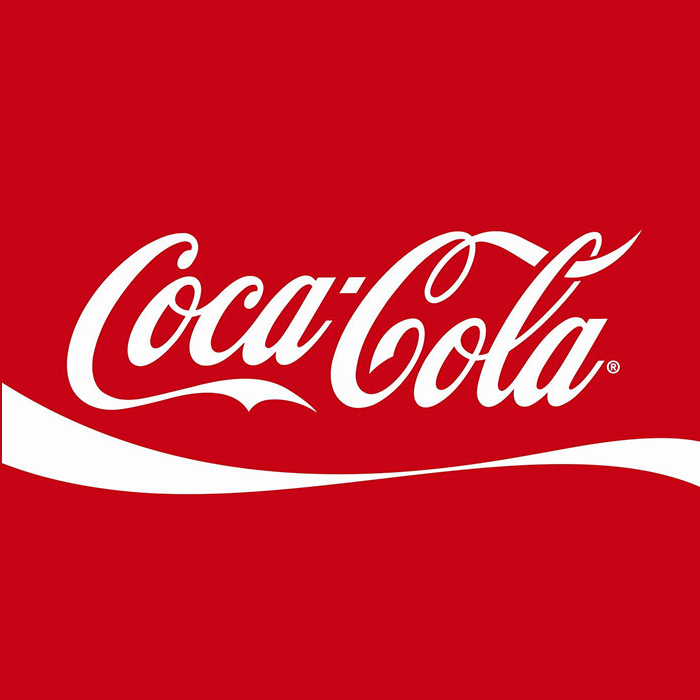

In [46]:
Image("coca-cola-logo.png")

In [47]:
coke_img = cv2.imread("coca-cola-logo.png", 1)
print("Image size is", coke_img.shape)
print("Data type of image is ", coke_img.dtype)
print('')

Image size is (700, 700, 3)
Data type of image is  uint8



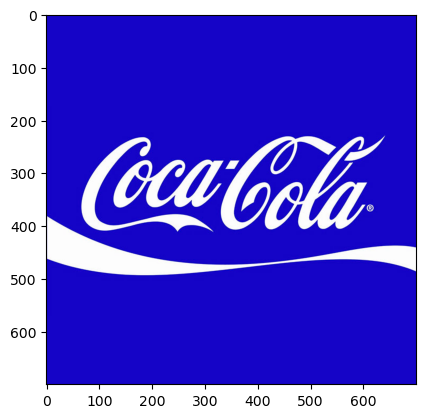

In [48]:
plt.imshow(coke_img)

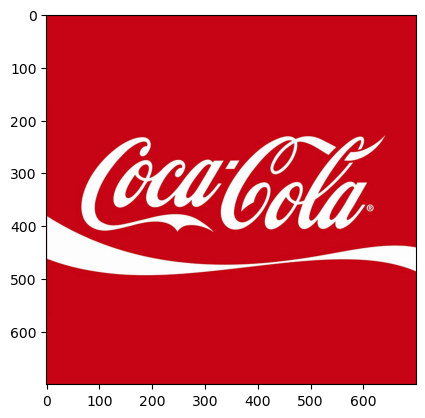

In [50]:
coke_img_channels_reserved = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reserved)

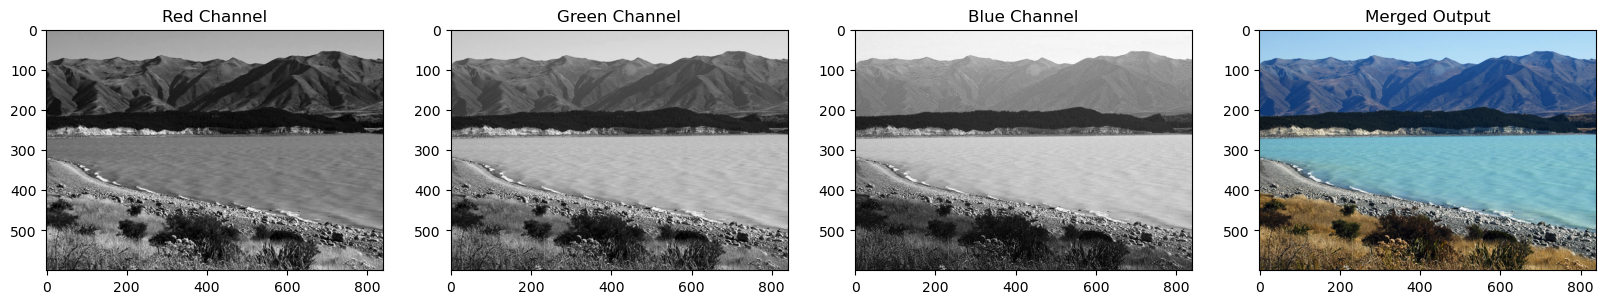

In [55]:
# Splitting and Merging Color Channels

img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
b,g,r = cv2.split(img_NZ_bgr)

# show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r, cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g, cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b, cmap='gray');plt.title("Blue Channel");

# Merge the indivual channels into a BGR image
imgMerged = cv2.merge((b,g,r))
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

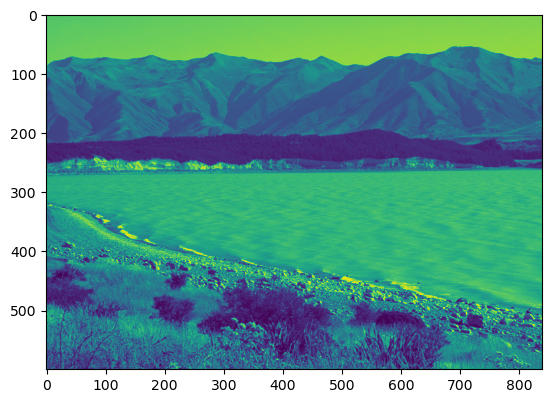

In [56]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(img_NZ_rgb)

Text(0.5, 1.0, 'Original')

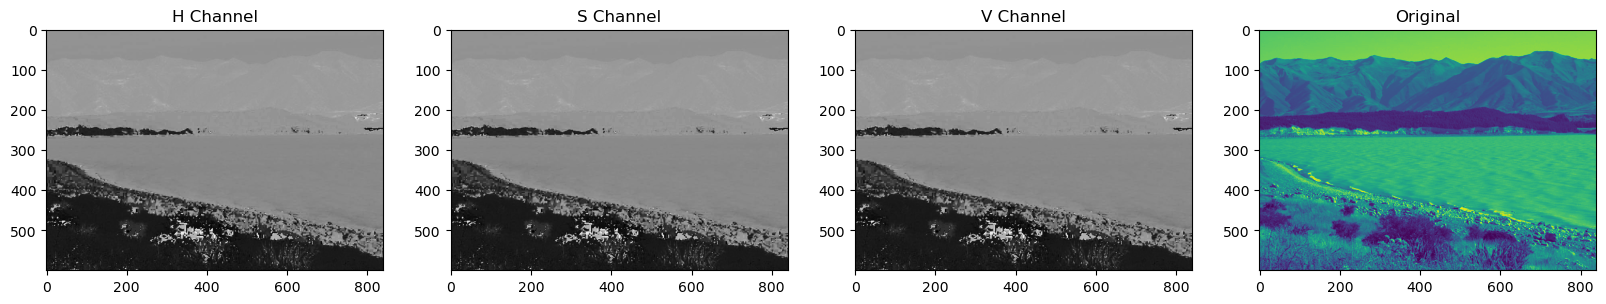

In [57]:
# changing to hsv color space

img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)

# show the channels
plt.figure(figsize=[20,5])
plt.subplot(141)
plt.imshow(h, cmap='gray')
plt.title("H Channel")

plt.subplot(142)
plt.imshow(h, cmap='gray')
plt.title("S Channel")

plt.subplot(143)
plt.imshow(h, cmap='gray')
plt.title("V Channel")

plt.subplot(144)
plt.imshow(img_NZ_rgb)
plt.title("Original")

Text(0.5, 1.0, 'Modified')

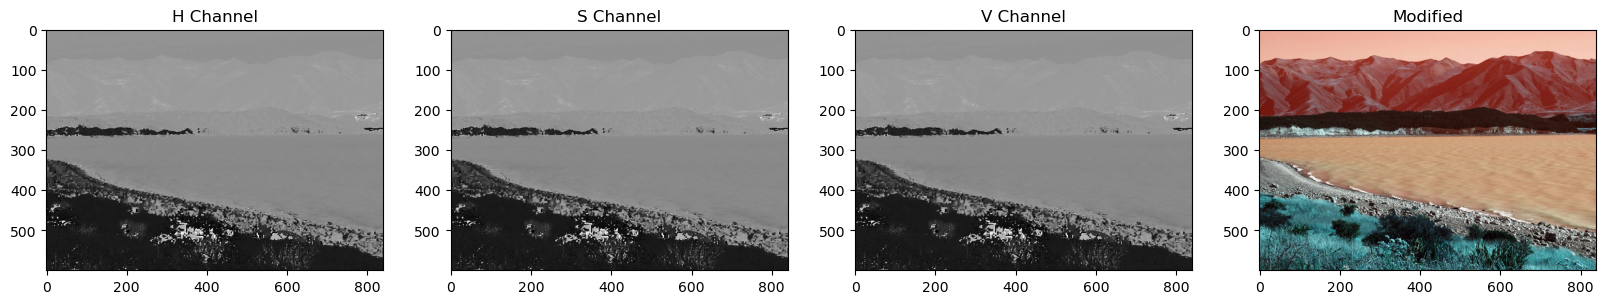

In [58]:
# Modifying indivual channel
h_new = h +10
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2BGR)

# show the channels 
plt.figure(figsize=[20,5])
plt.subplot(141)
plt.imshow(h, cmap='gray')
plt.title('H Channel')

plt.subplot(142)
plt.imshow(h, cmap='gray')
plt.title('S Channel')

plt.subplot(143)
plt.imshow(h, cmap='gray')
plt.title('V Channel')

plt.subplot(144)
plt.imshow(img_NZ_rgb)
plt.title('Modified')